In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('../../../data/XAUUSD_2010-2023.csv')
df = df.head(100_000)
# Convert the 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

In [25]:

# Select relevant features for clustering
features = [
    'open',
    'high',
    'low',
    'close',
    'rsi14',
    'sma14'
]

X = df[features]
X

,open
0,1098.45
1,1100.00
2,1099.70
3,1099.50
4,1099.40
...,...
99995,1514.23
99996,1514.78
99997,1515.18
99998,1515.38


In [26]:

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.45241882],
       [-1.4401681 ],
       [-1.44253921],
       ...,
       [ 1.8412845 ],
       [ 1.84286524],
       [ 1.85234966]])

In [30]:

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['Cluster'] = dbscan.fit_predict(X_scaled)

MemoryError: 

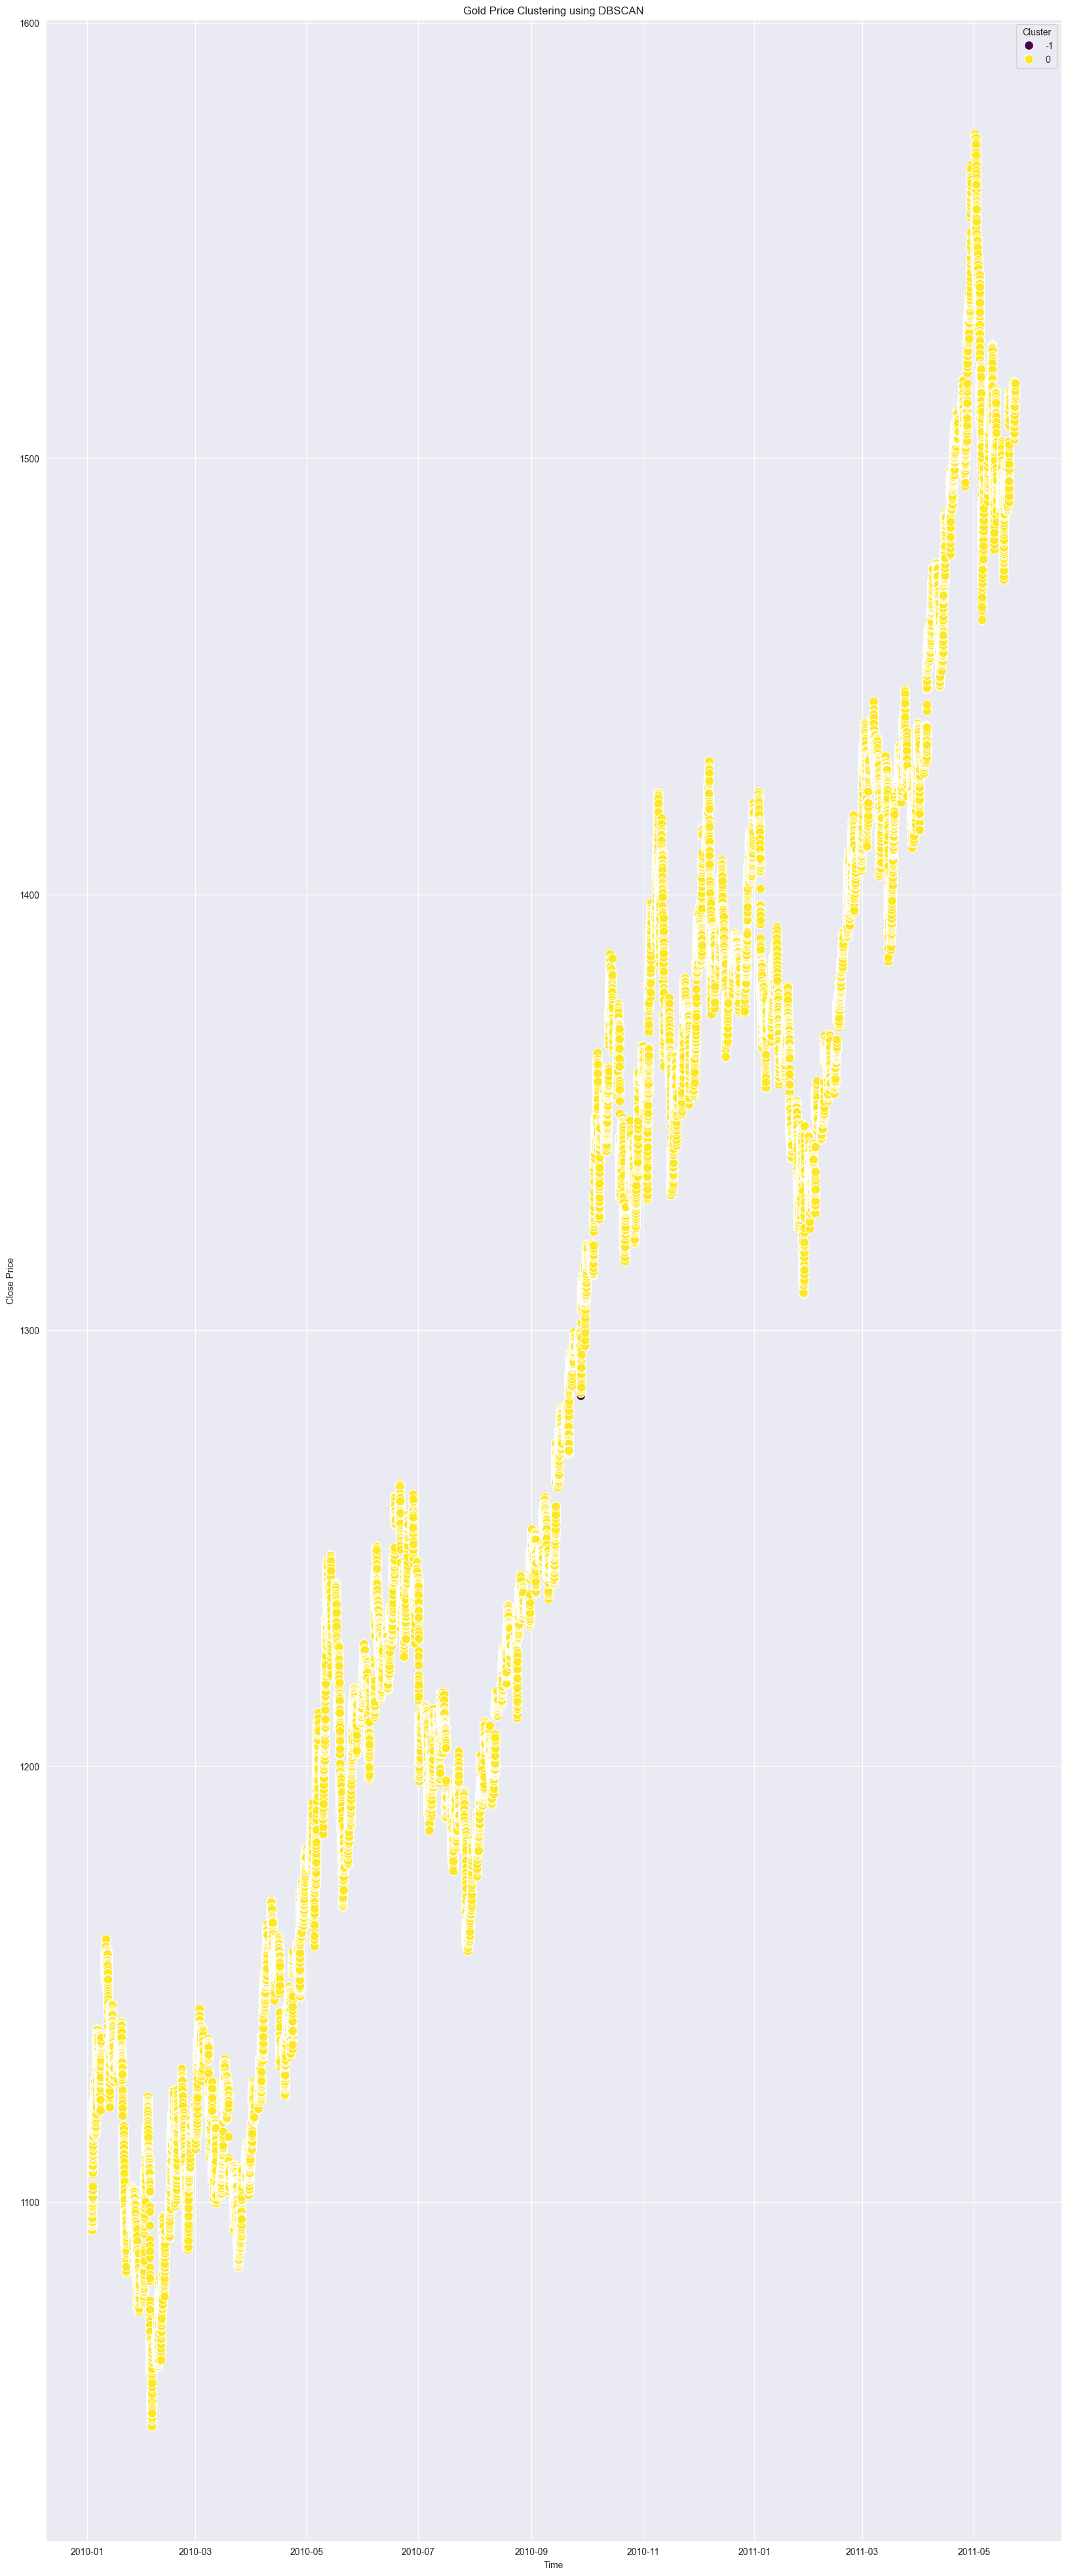

In [21]:

# Visualize the clusters
plt.figure(figsize=(20, 50))
sns.scatterplot(data=df, x='time', y='close', hue='Cluster', palette='viridis', s=100)
plt.title('Gold Price Clustering using DBSCAN')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend(title='Cluster')
plt.show()


In [ ]:
# --------------

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Sample data
data = {
    'time': ['2010-01-03 18:00:00'],
    'open': [1098.45],
    'high': [1100.00],
    'low': [1098.05],
    'close': [1099.95],
    'rsi14': [81.98],
    'sma14': [1096.38]
}

# Load the dataset
df = pd.read_csv('../../../data/XAUUSD_2010-2023.csv').head(1000)

# Add the first data entry
df = pd.concat([pd.DataFrame(data), df], ignore_index=True)

# Convert the 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Select relevant features for clustering
features = ['open', 
            'high',
            'low',
            'close',
            'rsi14', 'sma14']
X = df[features]

In [3]:

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['Cluster'] = dbscan.fit_predict(X_scaled)

<Figure size 1500x1000 with 0 Axes>

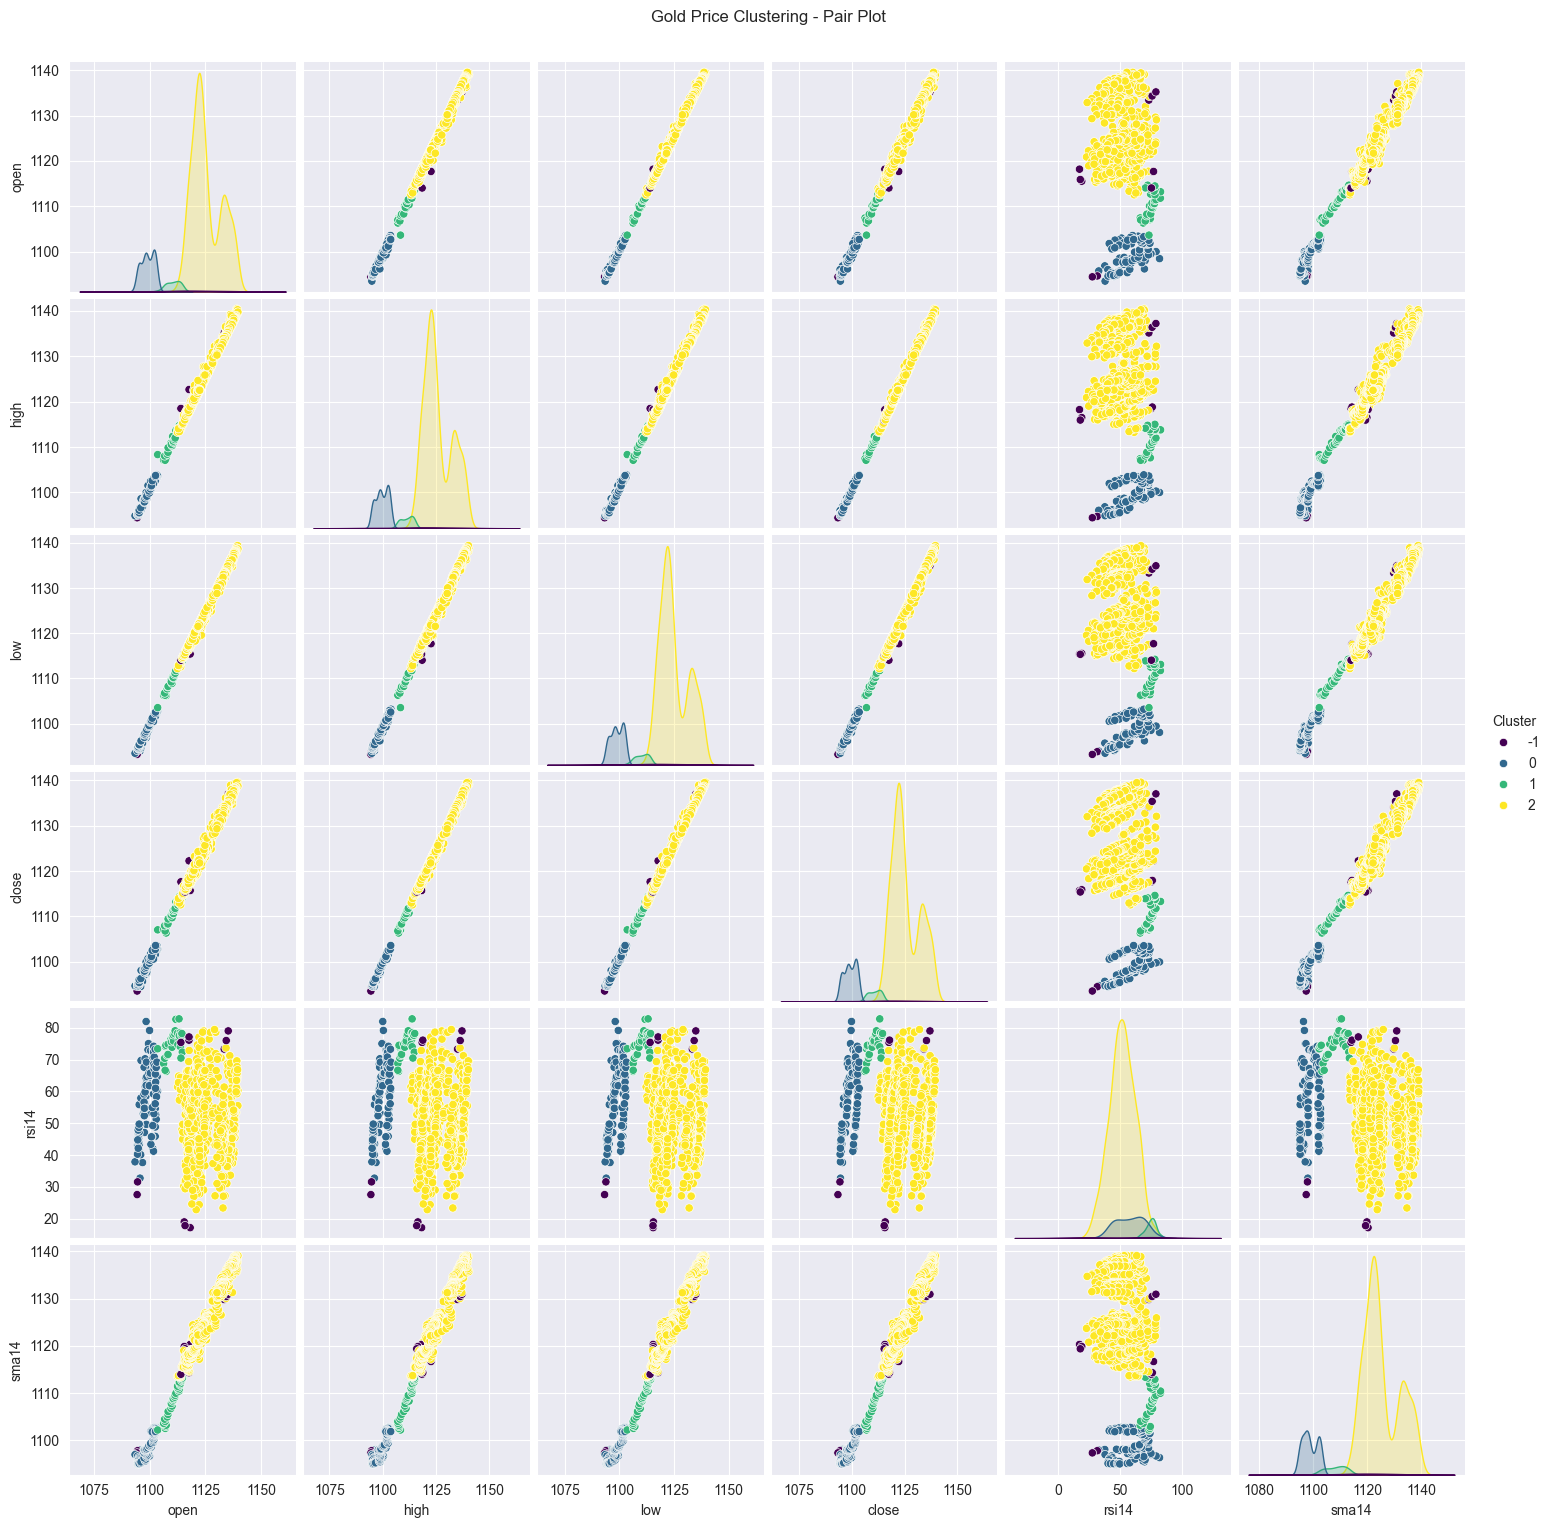

In [5]:

# Pair Plot
plt.figure(figsize=(15, 10))
sns.pairplot(df, vars=features, hue='Cluster', palette='viridis')
plt.suptitle('Gold Price Clustering - Pair Plot', y=1.02)
plt.show()

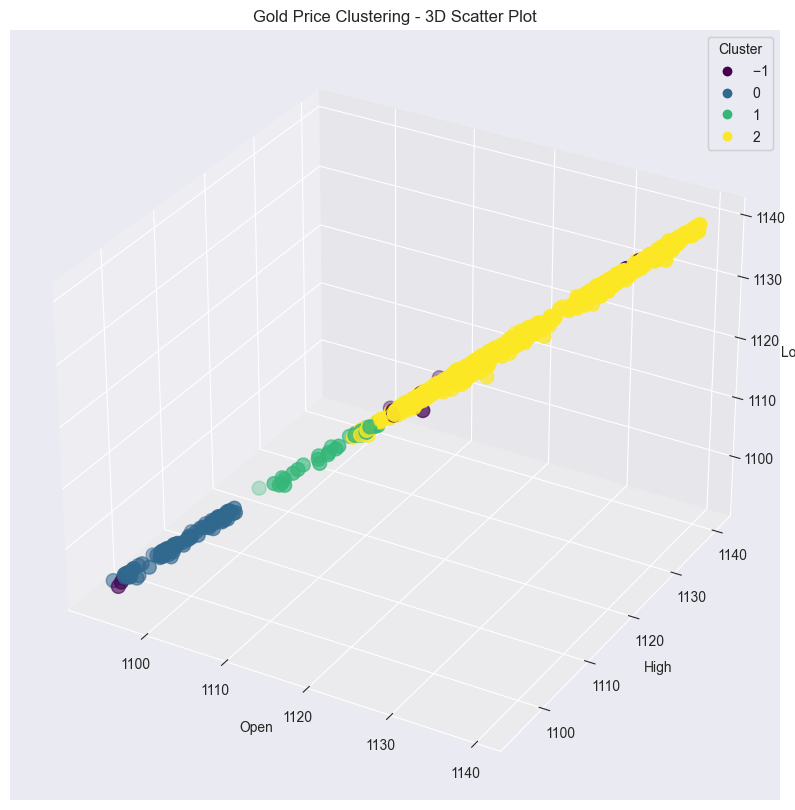

In [6]:

# 3D Scatter Plot
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['open'], df['high'], df['low'], c=df['Cluster'], cmap='viridis', s=100)
ax.set_title('Gold Price Clustering - 3D Scatter Plot')
ax.set_xlabel('Open')
ax.set_ylabel('High')
ax.set_zlabel('Low')
legend = ax.legend(*scatter.legend_elements(), title='Cluster')
ax.add_artist(legend)
plt.show()

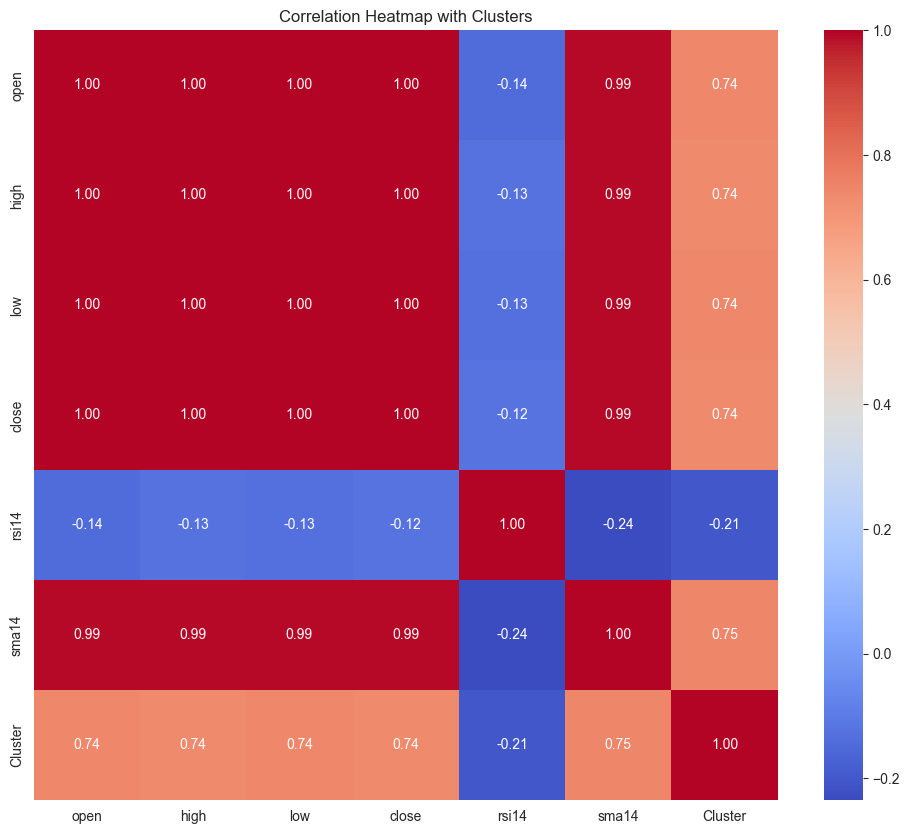

In [7]:

# Heatmap
plt.figure(figsize=(12, 10))
corr = df[features + ['Cluster']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap with Clusters')
plt.show()

C:\Users\liar88828\AppData\Local\Temp\ipykernel_10536\3258259128.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y=feature, palette='viridis')
C:\Users\liar88828\AppData\Local\Temp\ipykernel_10536\3258259128.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y=feature, palette='viridis')
C:\Users\liar88828\AppData\Local\Temp\ipykernel_10536\3258259128.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Cluster', y=feature, palette='viridis')
C:\Users\liar88828\AppData\Local\Temp\ip

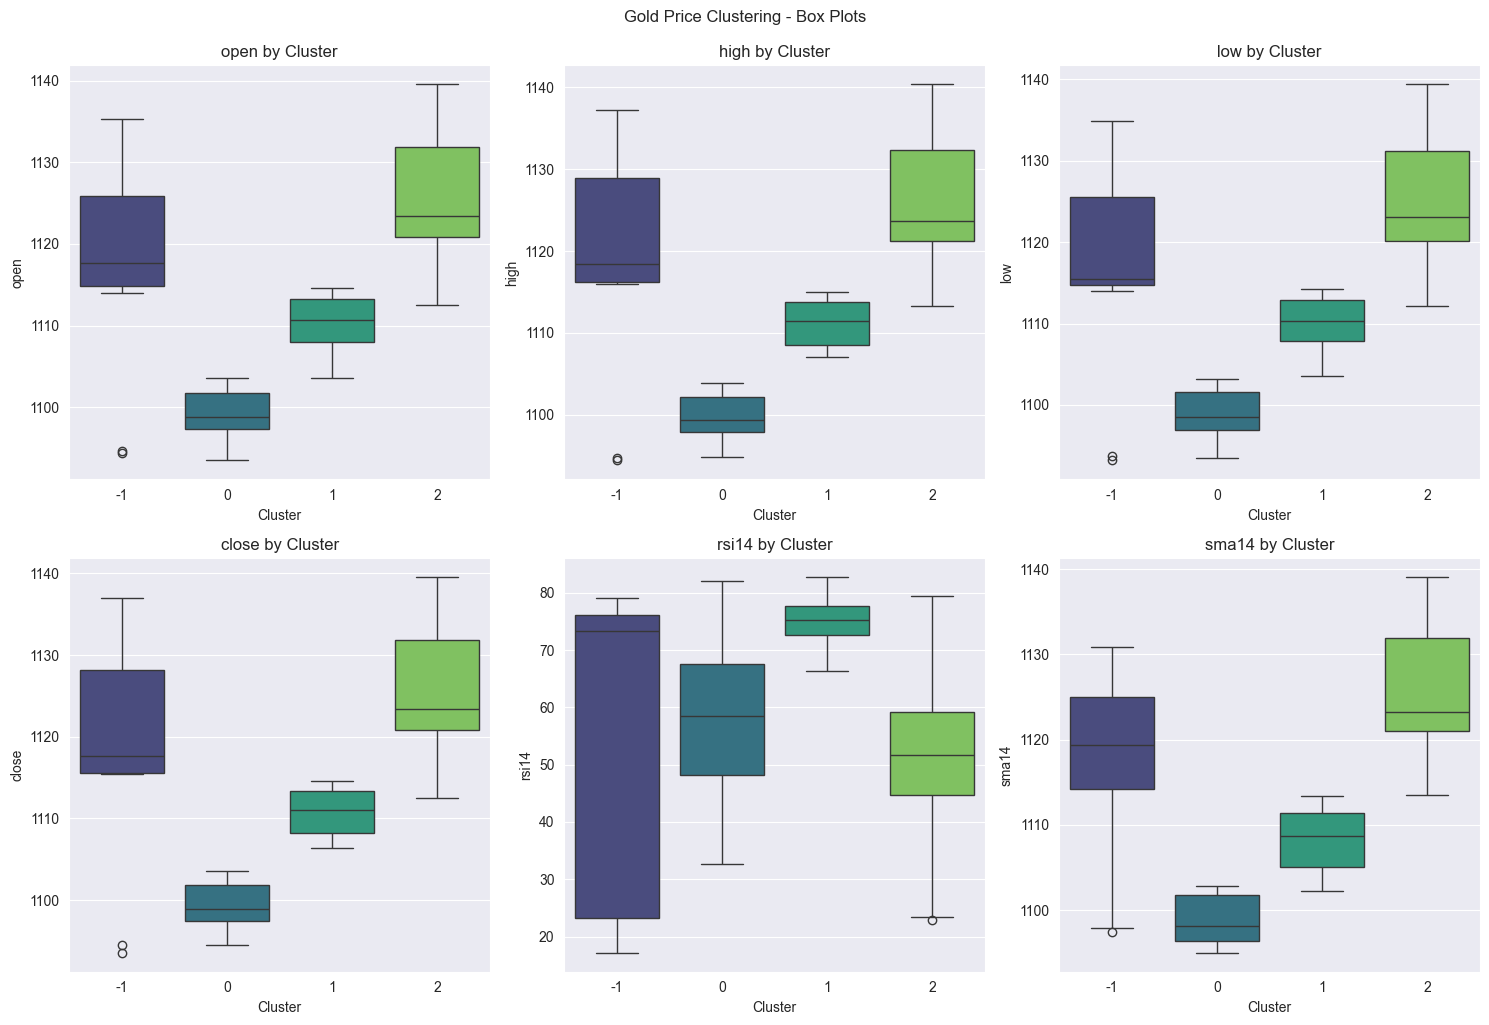

In [8]:

# Box Plots
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(
        data=df,
        x='Cluster',
        y=feature,
        palette='viridis')
    plt.title(f'{feature} by Cluster')
plt.tight_layout()
plt.suptitle('Gold Price Clustering - Box Plots', y=1.02)
plt.show()


C:\Users\liar88828\AppData\Local\Temp\ipykernel_10536\3681650395.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\liar88828\AppData\Local\Temp\ipykernel_10536\3681650395.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\liar88828\AppData\Local\Temp\ipykernel_10536\3681650395.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
C:\Users\liar88828\AppData\Local\Temp\ipykernel_10536\3681650395.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` va

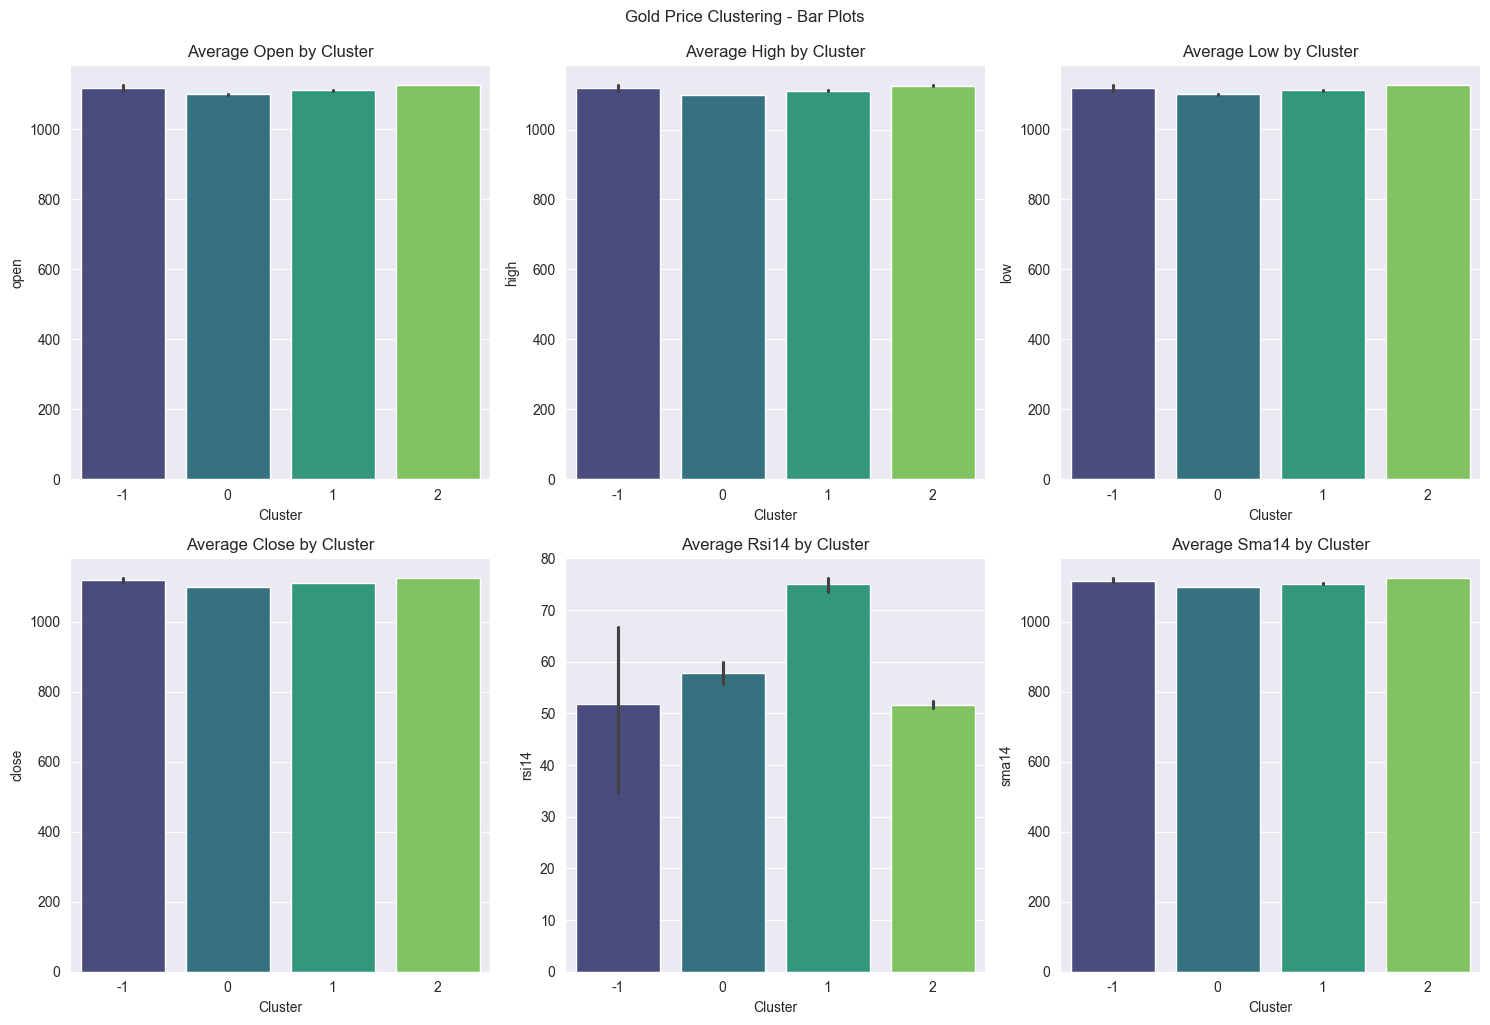

In [10]:
# Create bar plots for each feature
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features):
    plt.subplot(2, 3, i + 1)
    sns.barplot(
        data=df,
        x='Cluster',
        y=feature,
        palette='viridis',
        legend=False
    )
    plt.title(f'Average {feature.capitalize()} by Cluster')
plt.tight_layout()
plt.suptitle('Gold Price Clustering - Bar Plots', y=1.02)
plt.show()